In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
import pickle
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv(r"/Users/melisozturk/PycharmProjects/loan_model/loan_approval_dataset_updated.csv",
                   sep=";",
                   engine='python',
                   encoding="latin-1")

In [3]:
data.head()

,loan_id,no_of_dependents,City,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Ankara,Graduate,No,9600000,29900000,12,778.0,2400000.0,17600000,22700000,8000000,Approved
1,2,0,Ankara,Not Graduate,Yes,4100000,12200000,8,417.0,2700000.0,2200000,8800000,3300000,Rejected
2,3,3,Ankara,Graduate,No,9100000,29700000,20,NaN,7100000.0,4500000,33300000,12800000,Rejected
3,4,3,Ankara,Graduate,No,8200000,30700000,8,NaN,18200000.0,3300000,23300000,7900000,Rejected
4,5,5,Ankara,Not Graduate,Yes,9800000,24200000,20,NaN,12400000.0,8200000,29400000,5000000,Rejected


In [4]:
data.shape

(4269, 14)

In [5]:
data.loc[:, data.isna().any()]

,City,education,cibil_score,residential_assets_value
0,Ankara,Graduate,778.0,2400000.0
1,Ankara,Not Graduate,417.0,2700000.0
2,Ankara,Graduate,NaN,7100000.0
3,Ankara,Graduate,NaN,18200000.0
4,Ankara,Not Graduate,NaN,12400000.0
...,...,...,...,...
4264,Ýzmir,Graduate,317.0,2800000.0
4265,Ýzmir,Not Graduate,559.0,4200000.0
4266,Ýzmir,Not Graduate,457.0,1200000.0
4267,Ýzmir,Not Graduate,780.0,8200000.0


In [6]:
data.columns

Index(['loan_id', ' no_of_dependents', 'City', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [7]:
df = data[(data.City.isna() == False) & (data[" education"].isna() == False)]

In [8]:
df = df.replace(np.nan, 0)

In [9]:
df.head()

,loan_id,no_of_dependents,City,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Ankara,Graduate,No,9600000,29900000,12,778.0,2400000.0,17600000,22700000,8000000,Approved
1,2,0,Ankara,Not Graduate,Yes,4100000,12200000,8,417.0,2700000.0,2200000,8800000,3300000,Rejected
2,3,3,Ankara,Graduate,No,9100000,29700000,20,0.0,7100000.0,4500000,33300000,12800000,Rejected
3,4,3,Ankara,Graduate,No,8200000,30700000,8,0.0,18200000.0,3300000,23300000,7900000,Rejected
4,5,5,Ankara,Not Graduate,Yes,9800000,24200000,20,0.0,12400000.0,8200000,29400000,5000000,Rejected


In [10]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4028.000000,4028.000000,4.028000e+03,4.028000e+03,4028.000000,4028.000000,4.028000e+03,4.028000e+03,4.028000e+03,4.028000e+03
mean,2058.624379,2.493049,5.061966e+06,1.513803e+07,10.890765,546.520854,7.283044e+06,4.985228e+06,1.514737e+07,4.982920e+06
std,1211.678956,1.697718,2.805406e+06,9.043574e+06,5.711288,236.550255,6.553892e+06,4.394239e+06,9.109618e+06,3.249115e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,0.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1018.750000,1.000000,2.700000e+06,7.700000e+06,6.000000,407.000000,1.900000e+06,1.400000e+06,7.500000e+06,2.400000e+06
50%,2032.500000,3.000000,5.100000e+06,1.450000e+07,10.000000,569.000000,5.400000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3048.250000,4.000000,7.500000e+06,2.140000e+07,16.000000,730.000000,1.112500e+07,7.700000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [11]:
def column_scaler(column_name, df_):
    scaler = StandardScaler()
    return scaler.fit_transform(df_[[column_name]])


In [12]:
df.columns

Index(['loan_id', ' no_of_dependents', 'City', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [13]:
df.columns = [x.strip() for x in df.columns]
df.columns = [x.lower() for x in df.columns]

In [14]:
numeric_columns = ["no_of_dependents", "income_annum", "loan_amount", "cibil_score", "residential_assets_value",
                  "commercial_assets_value", "luxury_assets_value", "bank_asset_value"]

In [15]:
for num_col in numeric_columns:
    df[num_col] = column_scaler(column_name=num_col, df_=df)

In [16]:
# # categorical columns
# df['City'] = df['City'].astype('category')
# df['education'] = df['education'].astype('category')
# df['self_employed'] = df['self_employed'].astype('category')
# cat_columns = df.select_dtypes(['category']).columns
# df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

In [17]:
df = pd.get_dummies(df, columns=['city'])
df = pd.get_dummies(df, columns=['education'])
df = pd.get_dummies(df, columns=['self_employed'])

In [18]:
df.head()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,city_Ankara,city_Bursa,city_Erzurum,city_Ýstanbul,city_Ýzmir,education_ Graduate,education_ Not Graduate,self_employed_ No,self_employed_ Yes
0,1,-0.290455,1.617804,1.632518,12,0.978684,-0.745153,2.871109,0.829186,0.928701,Approved,1,0,0,0,0,1,0,1,0
1,2,-1.468653,-0.342940,-0.324916,8,-0.547609,-0.699373,-0.633915,-0.696863,-0.518027,Rejected,1,0,0,0,0,0,1,0,1
2,3,0.298645,1.439555,1.610400,20,-2.310666,-0.027932,-0.110437,1.992936,2.406209,Rejected,1,0,0,0,0,1,0,1,0
3,4,0.298645,1.118706,1.720990,8,-2.310666,1.665928,-0.383556,0.895059,0.897919,Rejected,1,0,0,0,0,1,0,1,0
4,5,1.476843,1.689104,1.002158,20,-2.310666,0.780848,0.731679,1.564764,0.005258,Rejected,1,0,0,0,0,0,1,0,1


In [19]:
df.columns =  ["_".join(x.lower().split(" ")).replace("ý", "i") for x in df.columns]

In [20]:
df['loan_status'] = df['loan_status'].astype('category')
cat_columns = df.select_dtypes(['category']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

In [21]:
df

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,city_ankara,city_bursa,city_erzurum,city_istanbul,city_izmir,education__graduate,education__not_graduate,self_employed__no,self_employed__yes
0,1,-0.290455,1.617804,1.632518,12,0.978684,-0.745153,2.871109,0.829186,0.928701,0,1,0,0,0,0,1,0,1,0
1,2,-1.468653,-0.342940,-0.324916,8,-0.547609,-0.699373,-0.633915,-0.696863,-0.518027,1,1,0,0,0,0,0,1,0,1
2,3,0.298645,1.439555,1.610400,20,-2.310666,-0.027932,-0.110437,1.992936,2.406209,1,1,0,0,0,0,1,0,1,0
3,4,0.298645,1.118706,1.720990,8,-2.310666,1.665928,-0.383556,0.895059,0.897919,1,1,0,0,0,0,1,0,1,0
4,5,1.476843,1.689104,1.002158,20,-2.310666,0.780848,0.731679,1.564764,0.005258,1,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,1.476843,-1.448086,-1.419752,12,-0.970404,-0.684113,-1.020833,-1.300696,-1.287563,1,0,0,0,0,1,1,0,0,1
4265,4266,-1.468653,-0.628139,-0.424446,20,0.052761,-0.470473,-0.474596,-0.455330,-0.948967,0,0,0,0,0,1,0,1,0,1
4266,4267,-0.290455,0.512657,0.968981,18,-0.378490,-0.928273,1.687594,0.324163,0.713231,1,0,0,0,0,1,0,1,1,0
4267,4268,-0.879554,-0.342940,-0.258562,8,0.987140,0.139928,-0.975313,-0.114988,0.251509,0,0,0,0,0,1,0,1,1,0


In [22]:
y = df['loan_status']
X = df.drop(['loan_status', "loan_id"],axis=1)

In [23]:
X.columns

Index(['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term',
       'cibil_score', 'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'city_ankara', 'city_bursa',
       'city_erzurum', 'city_istanbul', 'city_izmir', 'education__graduate',
       'education__not_graduate', 'self_employed__no', 'self_employed__yes'],
      dtype='object')

In [24]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [25]:
# Check the balance of the dataset (train set)
y_train.value_counts()

0    1684
1    1014
Name: loan_status, dtype: int64

In [26]:
# Check the balance of the dataset (train set)
y_test.value_counts()

0    830
1    500
Name: loan_status, dtype: int64

### Train data is not perfectly balanced. But since our data is not big enough, this split can be used to train and evaulate the model.

In [27]:
data.iloc[956]

loan_id                                957
 no_of_dependents                        0
City                                 Bursa
 education                    Not Graduate
 self_employed                         Yes
 income_annum                      9100000
 loan_amount                      22000000
 loan_term                              12
 cibil_score                         387.0
 residential_assets_value       25300000.0
 commercial_assets_value          15600000
 luxury_assets_value              31700000
 bank_asset_value                  7000000
 loan_status                      Rejected
Name: 956, dtype: object

In [28]:
# Try KNN Classsifier
knnclassifier = KNeighborsClassifier(n_neighbors = int(X.shape[1]/2))
knnclassifier.fit(X_train, y_train)
prediction = knnclassifier.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test, prediction))

tneg, fpos, fneg, tpos = confusion_matrix(y_test, prediction).ravel()
print(tneg,fpos,fneg,tpos)

Accuracy Score:  0.8097744360902256
716 114 139 361


In [29]:
# Try Logistic Regression Classsifier
lregclassifier = LogisticRegression()
lregclassifier.fit(X_train,y_train)
lregprediction = lregclassifier.predict(X_test)
print("Score: ",lregclassifier.score(X_test, y_test))

tneg, fpos, fneg, tpos = confusion_matrix(y_test, lregprediction).ravel()
print(tneg,fpos,fneg,tpos)

Score:  0.8172932330827067
726 104 139 361


In [30]:
# Try SVC Classsifier 

from sklearn.svm import SVC
clf = SVC(gamma='auto', kernel ='linear')
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test, pred))

tneg, fpos, fneg, tpos = confusion_matrix(y_test, pred).ravel()
print(tneg,fpos,fneg,tpos)

Accuracy Score:  0.8353383458646616
708 122 97 403


In [31]:
# Try Xgboost Classsifier

XGBclf = XGBClassifier()
XGBclf.fit(X_train,y_train)

XGBpred = XGBclf.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test, XGBpred))

tneg, fpos, fneg, tpos = confusion_matrix(y_test, XGBpred).ravel()
print(tneg,fpos,fneg,tpos)

Accuracy Score:  0.9466165413533835
805 25 46 454


In [32]:
# Get Classification Report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, XGBpred, digits=4))

              precision    recall  f1-score   support

           0     0.9459    0.9699    0.9578       830
           1     0.9478    0.9080    0.9275       500

    accuracy                         0.9466      1330
   macro avg     0.9469    0.9389    0.9426      1330
weighted avg     0.9466    0.9466    0.9464      1330



In [33]:
# Try SGD Classsifier

SGDclf = SGDClassifier(loss='modified_huber',shuffle=True)
SGDclf.fit(X_train,y_train)

SGDpred = SGDclf.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test, SGDpred))

tneg, fpos, fneg, tpos = confusion_matrix(y_test, SGDpred).ravel()
print(tneg,fpos,fneg,tpos)

Accuracy Score:  0.6932330827067669
456 374 34 466


In [34]:
# Save using pickle
filename = 'loan_classification_model.sav'
pickle.dump(XGBclf, open(filename, 'wb'))

# Feature Importance

Text(0.5, 0, 'Xgboost Feature Importance')

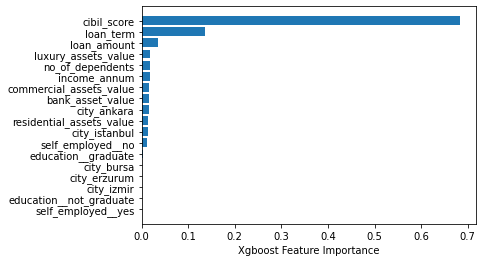

In [38]:
# BUilt-in feature importance


sorted_idx = XGBclf.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], XGBclf.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")


Text(0.5, 0, 'Permutation Importance')

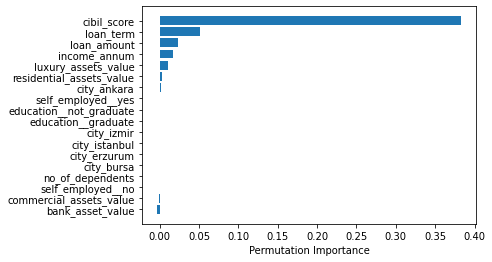

In [39]:
# Permutation based importance

from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(XGBclf, X_test, y_test)
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X_train.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

## It look like most important feauture in the decision of the loan status, is "cibil_score". The second most important is "loan_term". 

# Selected Model: Xgboost Classifier

Lets apply a hyperparameter tuning

In [40]:
XGBclf.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [42]:
%%time
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}

gsearch1 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1,
                                                  n_estimators=140,
                                                  max_depth=5,
                                                  min_child_weight=1,
                                                  gamma=0, 
                                                  subsample=0.8, 
                                                  colsample_bytree=0.8,
                                                  objective= 'binary:logistic',
                                                  nthread=4,
                                                  scale_pos_weight=1,
                                                  seed=27), 
                                                  param_grid = param_test1, 
                                                  scoring='roc_auc',
                                                  n_jobs=4,
                                                  cv=5)
gsearch1.fit(X_train, y_train)


CPU times: user 780 ms, sys: 74.6 ms, total: 855 ms
Wall time: 8.86 s


GridSearchCV(cv=5,
             estimator=XGBClassifier(colsample_bytree=0.8, max_depth=5,
                                     n_estimators=140, nthread=4, seed=27,
                                     subsample=0.8),
             n_jobs=4,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
             scoring='roc_auc')

In [43]:
gsearch1.cv_results_

{'mean_fit_time': array([0.25889521, 0.26777582, 0.26282873, 0.38064718, 0.37074933,
        0.36881771, 0.48050518, 0.45872049, 0.43495111, 0.55338683,
        0.51304116, 0.48117023]),
 'std_fit_time': array([0.00712741, 0.00536156, 0.00239489, 0.00634585, 0.0030086 ,
        0.00581501, 0.00734253, 0.00517485, 0.00336267, 0.00934122,
        0.00917769, 0.00603873]),
 'mean_score_time': array([0.00351081, 0.00345907, 0.00358882, 0.00483551, 0.00452938,
        0.00455408, 0.00564384, 0.00522413, 0.00483375, 0.00609813,
        0.00588827, 0.0054812 ]),
 'std_score_time': array([4.09954074e-05, 3.41804778e-05, 2.48947113e-04, 7.54278314e-05,
        1.43960494e-04, 2.30990984e-04, 8.41226433e-05, 5.55427487e-05,
        8.01487096e-05, 3.03069685e-05, 2.09130547e-04, 2.47934111e-04]),
 'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 9, 9, 9],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
 

In [44]:
gsearch1.best_params_ 

{'max_depth': 7, 'min_child_weight': 1}

In [45]:
gsearch1.best_score_

0.9905388881286072

### It looks like using those parameters, we are going to face an overfitting. Hence, we will contiue to use existing hyperparameters.

## Check Classification Report Again

In [41]:
print(classification_report(y_test, XGBpred, digits=4))

              precision    recall  f1-score   support

           0     0.9459    0.9699    0.9578       830
           1     0.9478    0.9080    0.9275       500

    accuracy                         0.9466      1330
   macro avg     0.9469    0.9389    0.9426      1330
weighted avg     0.9466    0.9466    0.9464      1330



## Checking the precision, recall and f1 scores of the chosen model, Both "Approved" and "Rejected" loans have been successfully predicted. But those results should be proved by much more data, and model should be rerained on a bigger dataset.